In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [ ]:
diabetes_1 = diabetes.copy(deep = True)
diabetes_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
print(diabetes_1.isnull().sum())

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome            0
dtype: int64


In [ ]:
#Separating the features and the labels
X = diabetes.iloc[:, :8]
y = diabetes.iloc[:, 8:]
X.shape, y.shape

((768, 8), (768, 1))

In [ ]:
#splitting into training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (652, 8) (116, 8)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_taining_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_taining_data)

Accuracy on training data :  0.8297546012269938


In [ ]:
#prediction on test data

prediction_on_test_data = classifier.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_test_data)

Accuracy on training data :  0.7586206896551724


[[61 13]
 [15 27]]


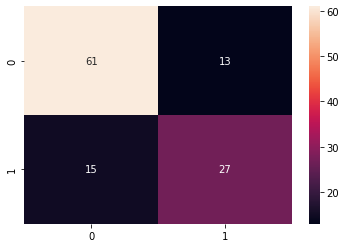

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
#Accuracy= TP+FN/TP+TN+FP+FN
accuracy=(15+61)/(61+13+15+27)
print(accuracy)

0.6551724137931034


In [ ]:
#Error rate= 1-Accuracy
error_rate= 1-accuracy
print(error_rate)

0.3448275862068966


In [ ]:
#Precision= TP/TP+FP
precision= (27)/(27+13)
print(precision)

0.675


In [ ]:
#Recall= TP/TP+FN
recall=(27)/(27+61)
print(recall)

0.3068181818181818
